In [3]:
import pandas as pd

# Load Titanic dataset from seaborn
import seaborn as sns
df = sns.load_dataset("titanic")

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df['age'] = df['age'].fillna(df['age'].median())


In [8]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])


In [9]:
df = df.drop(columns=['deck'])


In [10]:
df.isna().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['alone'] = le.fit_transform(df['alone'])
df['alive'] = le.fit_transform(df['alive'])
df['who'] = le.fit_transform(df['who'])
df['adult_male'] = le.fit_transform(df['adult_male'])

# One-hot encoding for class, embarked, and embark_town
df = pd.get_dummies(df, columns=['class', 'embarked', 'embark_town'], drop_first=True)

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alive,alone,class_Second,class_Third,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,1,1,0,0,False,True,False,True,False,True
1,1,1,0,38.0,1,0,71.2833,2,0,1,0,False,False,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,2,0,1,1,False,True,False,True,False,True
3,1,1,0,35.0,1,0,53.1000,2,0,1,0,False,False,False,True,False,True
4,0,3,1,35.0,0,0,8.0500,1,1,0,1,False,True,False,True,False,True


In [12]:
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

outliers_age = detect_outliers_iqr(df["age"])
outliers_fare = detect_outliers_iqr(df["fare"])

print("Age outliers:", len(outliers_age))
print("Fare outliers:", len(outliers_fare))


Age outliers: 66
Fare outliers: 116


In [13]:
def add_family_size(df):
    df = df.copy()
    df["family_size"] = df["sibsp"] + df["parch"] + 1
    return df

df = add_family_size(df)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alive,alone,class_Second,class_Third,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton,family_size
0,0,3,1,22.0,1,0,7.2500,1,1,0,0,False,True,False,True,False,True,2
1,1,1,0,38.0,1,0,71.2833,2,0,1,0,False,False,False,False,False,False,2
2,1,3,0,26.0,0,0,7.9250,2,0,1,1,False,True,False,True,False,True,1
3,1,1,0,35.0,1,0,53.1000,2,0,1,0,False,False,False,True,False,True,2
4,0,3,1,35.0,0,0,8.0500,1,1,0,1,False,True,False,True,False,True,1


In [14]:
def add_is_alone(df):
    df = df.copy()
    df["is_alone_flag"] = df["family_size"].apply(lambda x: 1 if x == 1 else 0)
    return df

df = add_is_alone(df)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alive,alone,class_Second,class_Third,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton,family_size,is_alone_flag
0,0,3,1,22.0,1,0,7.2500,1,1,0,0,False,True,False,True,False,True,2,0
1,1,1,0,38.0,1,0,71.2833,2,0,1,0,False,False,False,False,False,False,2,0
2,1,3,0,26.0,0,0,7.9250,2,0,1,1,False,True,False,True,False,True,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,1,0,False,False,False,True,False,True,2,0
4,0,3,1,35.0,0,0,8.0500,1,1,0,1,False,True,False,True,False,True,1,1


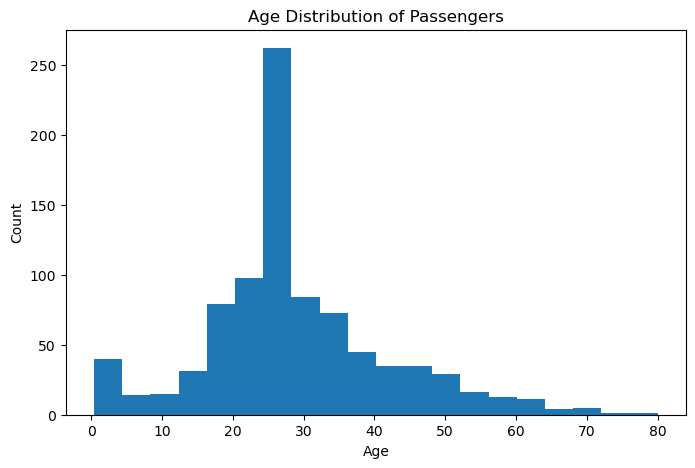

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["age"], bins=20)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


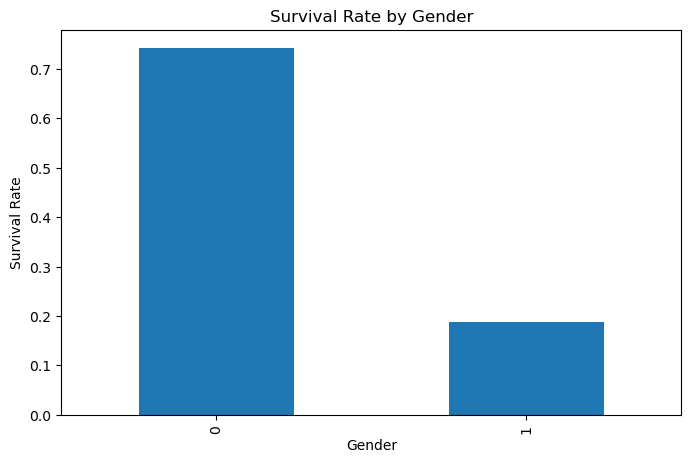

In [16]:
plt.figure(figsize=(8,5))
df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()
